In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [8]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [9]:
df.mean_area.quantile(0.999)

2499.864

<AxesSubplot:ylabel='mean_area'>

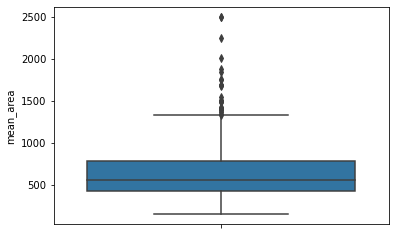

In [10]:
sns.boxplot(y='mean_area', data=df)

In [11]:
for mean_area in df.columns:
    #calculate the IQR
    IQR = df['mean_area'].quantile(0.75) - df['mean_area'].quantile(0.25)
    
    #calculate the boundries
    lower_s = df['mean_area'].quantile(0.25) - (IQR * 1.5)
    upper_s = df['mean_area'].quantile(0.75) + (IQR * 1.5)
    
    # replacing the outliers
    df['mean_area'] = np.where(df['mean_area'] > upper_s, upper_s, np.where(df['mean_area'] < lower_s, lower_s, df['mean_area']))

In [12]:
new_sell= df[(df.mean_area<upper_s) & (df.mean_area>lower_s)]
df[~df.isin(new_sell)].dropna()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
23,21.16,23.04,137.2,1326.3,0.09428,0.0
82,25.22,24.91,171.5,1326.3,0.10630,0.0
108,22.27,19.67,152.8,1326.3,0.13260,0.0
122,24.25,20.20,166.2,1326.3,0.14470,0.0
164,23.27,22.04,152.1,1326.3,0.08439,0.0
180,27.22,21.87,182.1,1326.3,0.10940,0.0
202,23.29,26.67,158.9,1326.3,0.11410,0.0
212,28.11,18.47,188.5,1326.3,0.11420,0.0
236,23.21,26.97,153.5,1326.3,0.09509,0.0
250,20.94,23.56,138.9,1326.3,0.10070,0.0


<AxesSubplot:ylabel='mean_area'>

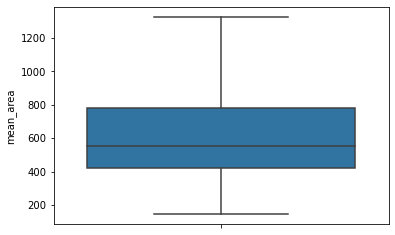

In [13]:
sns.boxplot(y='mean_area', data=df)

<AxesSubplot:ylabel='mean_perimeter'>

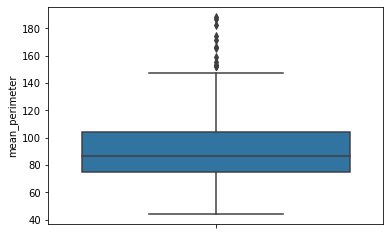

In [14]:
sns.boxplot(y='mean_perimeter', data=df)

In [15]:
for mean_perimeter in df.columns:
    #calculate the IQR
    IQR = df['mean_perimeter'].quantile(0.75) - df['mean_perimeter'].quantile(0.25)
    
    #calculate the boundries
    lower_s = df['mean_perimeter'].quantile(0.25) - (IQR * 1.5)
    upper_s = df['mean_perimeter'].quantile(0.75) + (IQR * 1.5)
    
    # replacing the outliers
    df['mean_perimeter'] = np.where(df['mean_perimeter'] > upper_s, upper_s, np.where(df['mean_perimeter'] < lower_s, lower_s, df['mean_perimeter']))

In [16]:
new_sell1= df[(df.mean_perimeter<upper_s) & (df.mean_perimeter>lower_s)]
df[~df.isin(new_sell1)].dropna()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
82,25.22,24.91,147.495,1326.3,0.10630,0.0
108,22.27,19.67,147.495,1326.3,0.13260,0.0
122,24.25,20.20,147.495,1326.3,0.14470,0.0
164,23.27,22.04,147.495,1326.3,0.08439,0.0
180,27.22,21.87,147.495,1326.3,0.10940,0.0
202,23.29,26.67,147.495,1326.3,0.11410,0.0
212,28.11,18.47,147.495,1326.3,0.11420,0.0
236,23.21,26.97,147.495,1326.3,0.09509,0.0
339,23.51,24.27,147.495,1326.3,0.10690,0.0
352,25.73,17.46,147.495,1326.3,0.11490,0.0


<AxesSubplot:ylabel='mean_perimeter'>

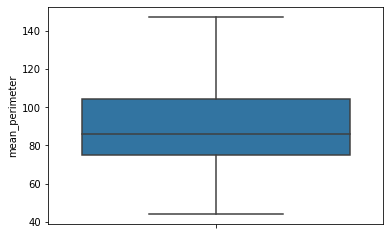

In [17]:
sns.boxplot(y='mean_perimeter', data=df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


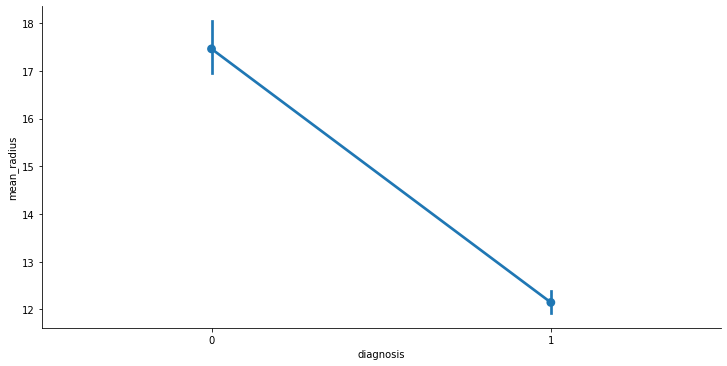

In [19]:
sns.catplot(x='diagnosis',y='mean_radius', data=df, kind='point',ci=99,aspect=2)

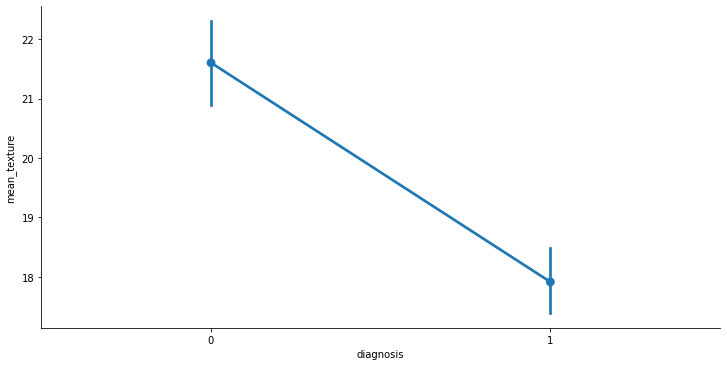

In [20]:
sns.catplot(x='diagnosis',y='mean_texture', data=df, kind='point',ci=99,aspect=2)

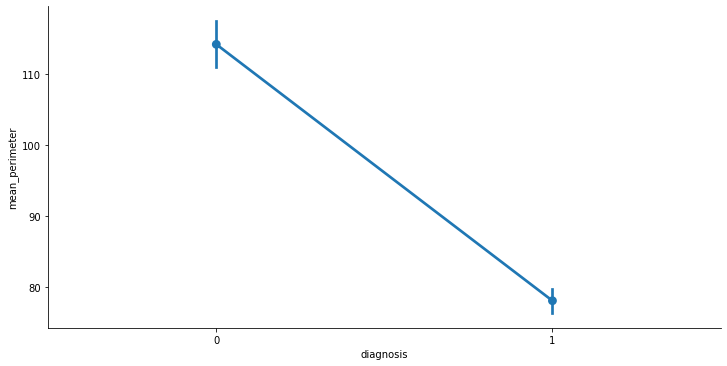

In [21]:
sns.catplot(x='diagnosis',y='mean_perimeter', data=df, kind='point',ci=99,aspect=2)

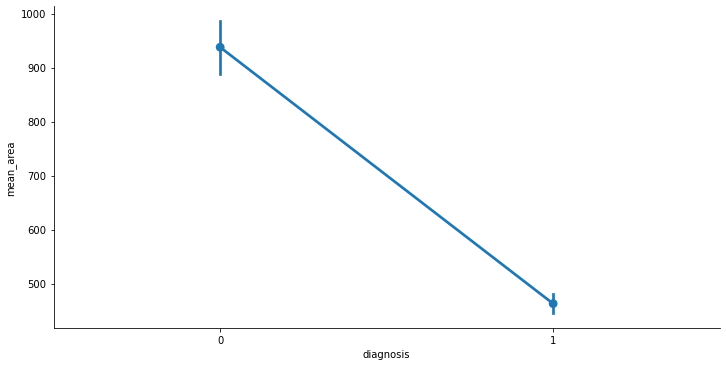

In [22]:
sns.catplot(x='diagnosis',y='mean_area', data=df, kind='point',ci=99,aspect=2)

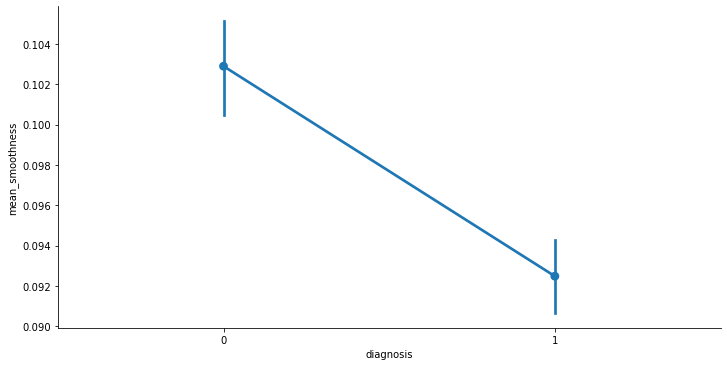

In [23]:
sns.catplot(x='diagnosis',y='mean_smoothness', data=df, kind='point',ci=99,aspect=2)

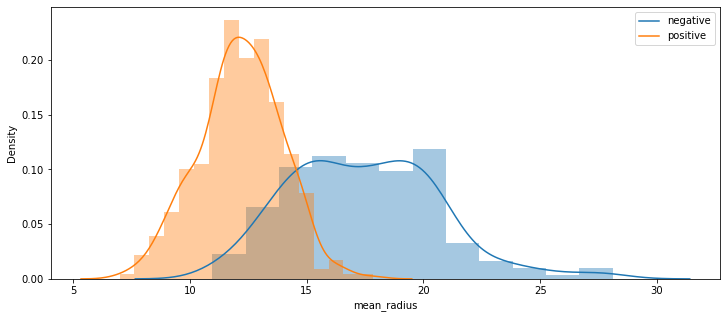

In [24]:
#analytics btw catergorical and numeric
plt.figure(figsize=(12,5))
sns.distplot(df.mean_radius[df.diagnosis==0])
sns.distplot(df.mean_radius[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

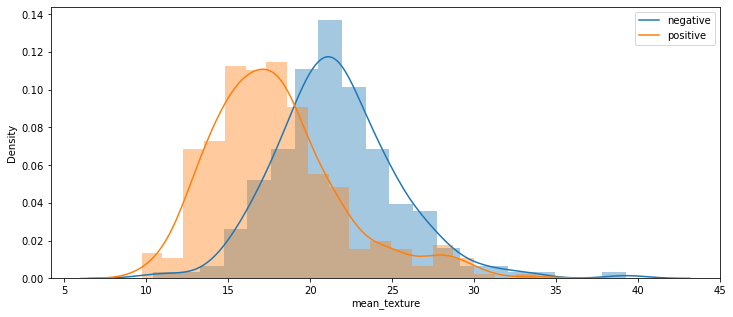

In [25]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_texture[df.diagnosis==0])
sns.distplot(df.mean_texture[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

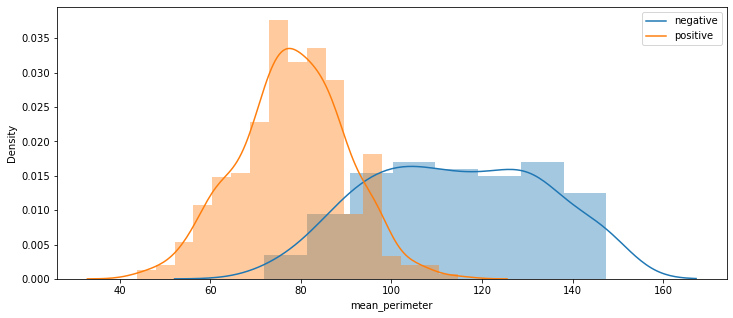

In [26]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_perimeter[df.diagnosis==0])
sns.distplot(df.mean_perimeter[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

 at range 50 to 100  case is positive

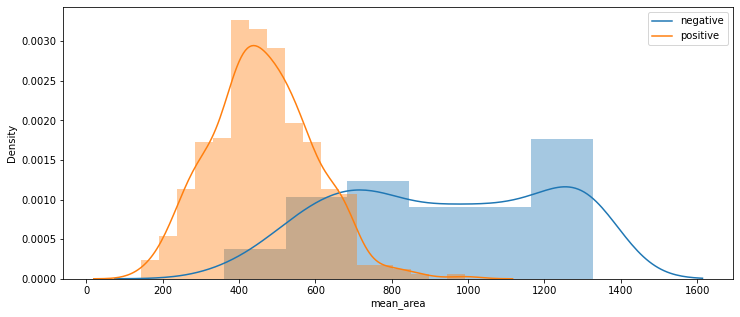

In [27]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_area[df.diagnosis==0])
sns.distplot(df.mean_area[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

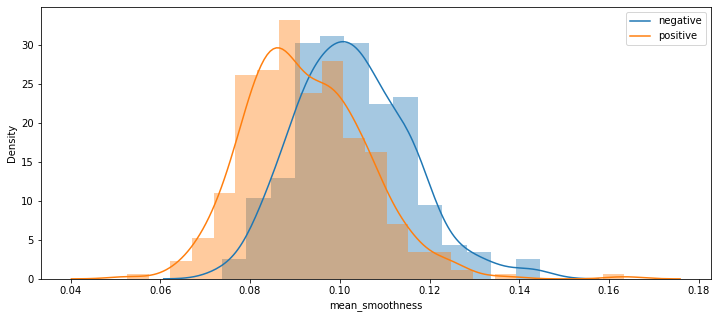

In [28]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_smoothness[df.diagnosis==0])
sns.distplot(df.mean_smoothness[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

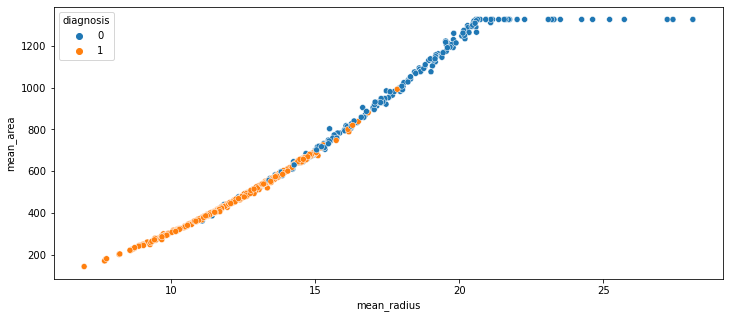

In [29]:
#categorical v/s numerical v/s categorical 
#x ,y, hue>> x= cateogircal,y=numerical,hue= cateogrical
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_area',hue='diagnosis',data=df)
plt.show()

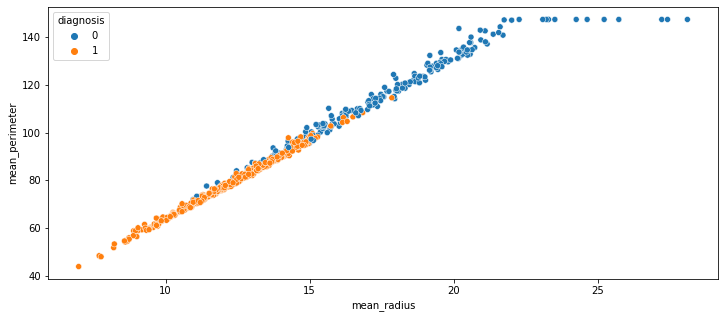

In [30]:
#categorical v/s numerical v/s categorical 
#x ,y, hue>> x= cateogircal,y=numerical,hue= cateogrical
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_perimeter',hue='diagnosis',data=df)
plt.show()

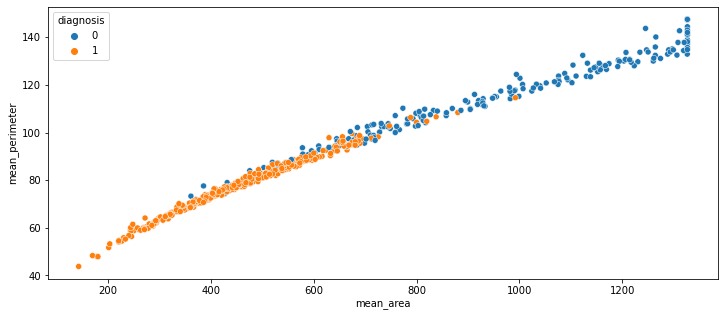

In [31]:
#categorical v/s numerical v/s categorical 
#x ,y, hue>> x= cateogircal,y=numerical,hue= cateogrical
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_area',y='mean_perimeter',hue='diagnosis',data=df)
plt.show()

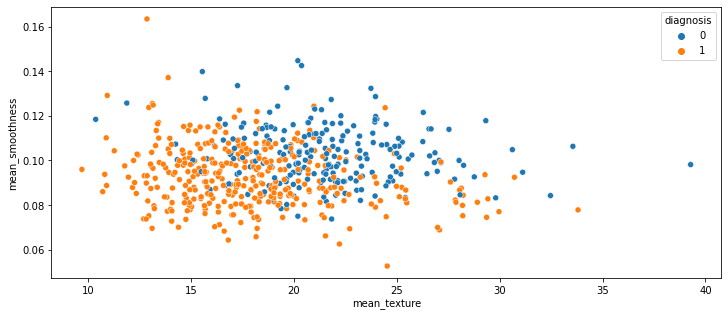

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_texture',y='mean_smoothness',hue='diagnosis',data=df)
plt.show()

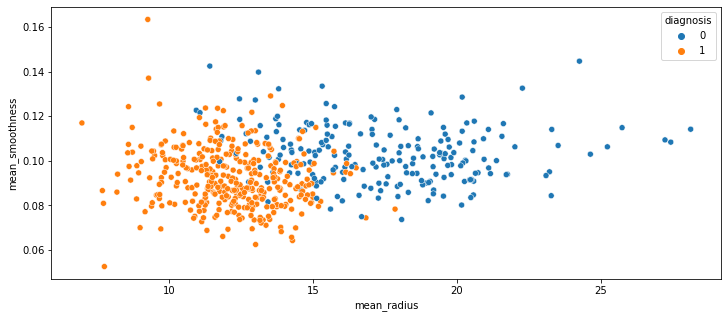

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_smoothness',hue='diagnosis',data=df)
plt.show()

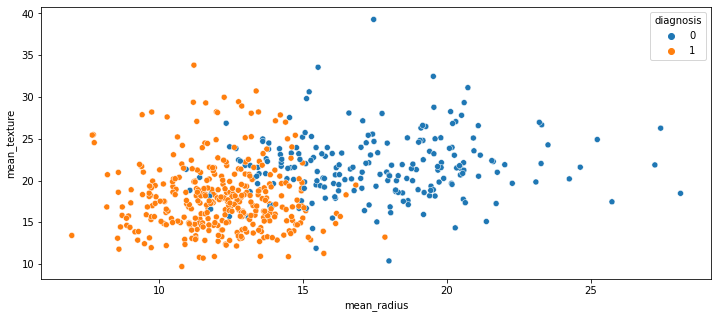

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_texture',hue='diagnosis',data=df)
plt.show()

<AxesSubplot:>

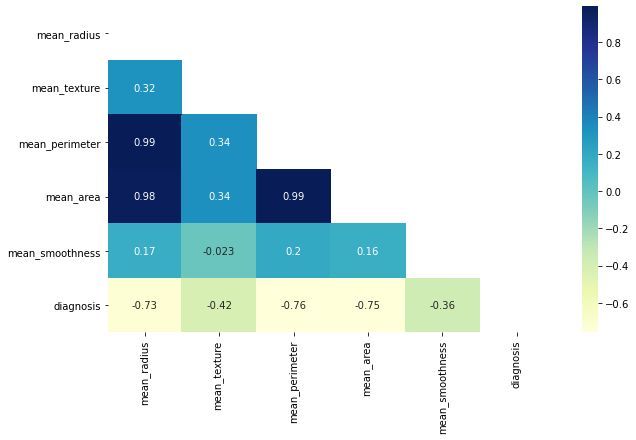

In [35]:
plt.figure(figsize=(10,6))
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,cmap='YlGnBu', mask=mask)

In [36]:
X=df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']]
y=df["diagnosis"]

In [37]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = random_state)

In [48]:
log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The best parameters for using this model is {'C': 100, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.5s finished


In [49]:
model = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)
model.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42)

In [50]:
# radius-16.65,texture-21.38,perimeter-110,area-904.6,smoothness-0.1121
new_case=[[16.65,21.38,110,904.6,0.1121]]
model.predict(new_case)

array([0], dtype=int64)

In [51]:
y_pred = model.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9473684210526315

---

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [59]:
model2 = RandomForestClassifier(n_estimators=2800, min_samples_split=2, min_samples_leaf=1, max_features='auto',max_depth=100, bootstrap=True)

In [60]:
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=2800)

In [61]:
y_pred2 = model2.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred2)

0.956140350877193

In [63]:
import pickle

In [64]:
filename = 'cancer.pkl'

In [65]:
pickle.dump(model2,open(filename,'wb'))